# 104. 二叉树的最大深度

给定一个二叉树 root ，返回其最大深度。

二叉树的 最大深度 是指从根节点到最远叶子节点的最长路径上的节点数。

 

示例 1：

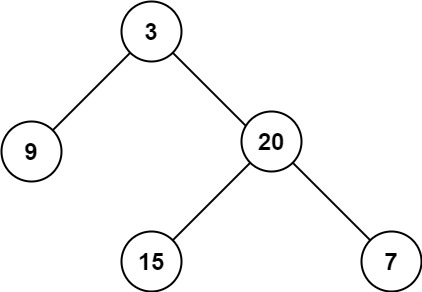

 

输入：root = [3,9,20,null,null,15,7]
输出：3

示例 2：

输入：root = [1,null,2]
输出：2
 

提示：

树中节点的数量在 [0, 104] 区间内。
-100 <= Node.val <= 100

In [6]:
class Treenode:
    def __init__(self, val=0, left=None, right=None):
        self.val= val
        self.left = left 
        self.right = right

def list2treenode(vals):
    if not vals: return None
    def inner(index):
        if index >= len(vals) or vals[index] is None:
            return None
        node = Treenode(vals[index])

        node.left = inner(2 * index + 1)
        node.right = inner(2 * index + 2)
    
        return node
    return inner(0)

lst = [1, 2, 3, 4]
root_of_tree = list2treenode(lst)
print(root_of_tree)
    


In [7]:
# 从下至上
def f104_1(root):
    if not root: return 0
    return max(
        f104_1(root.left),
        f104_1(root.right)
    ) + 1

root = [3,9,20,None,None,15,7]
root = list2treenode(root)
f104_1(root)

3

In [10]:
# 从上至下
def f103_2(root):
    ans = 0
    def dfs(node, depth):
        nonlocal ans
        if not node:
            ans = max(ans, depth)
            return
        dfs(node.left, depth+1)
        dfs(node.right, depth+1)
    dfs(root, 0)
    return ans
root = [1,None,2]
root = list2treenode(root)
f104_1(root)

2

In [11]:
# 层序遍历
def f103_3(root):
    if not root: return 0
    queue, ans = [root], 0
    while queue:
        temp = []
        for node in queue:
            if node.left : temp.append(node.left)
            if node.right : temp.append(node.right)
        queue = temp
        ans += 1
    return ans
root = [1,None,2]
root = list2treenode(root)
f104_1(root)


2

# 111. 二叉树的最小深度

给定一个二叉树，找出其最小深度。

最小深度是从根节点到最近叶子节点的最短路径上的节点数量。

说明：叶子节点是指没有子节点的节点。

 

示例 1：

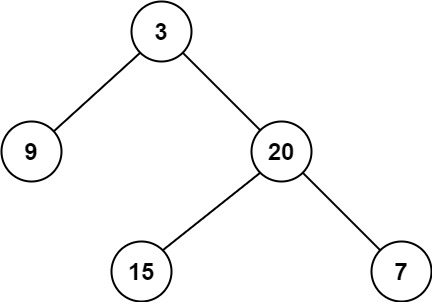

输入：root = [3,9,20,null,null,15,7]
输出：2
示例 2：

输入：root = [2,null,3,null,4,null,5,null,6]
输出：5
 

提示：

树中节点数的范围在 [0, 105] 内
-1000 <= Node.val <= 1000

In [4]:
class Treenode:
    def __init__(self, val=0, left=None, right = None):
        self.val = val
        self.left = left
        self.right = right
def lis2Treenode(vals):
    if not vals:return None
    def inner(index):
        if index >= len(vals) or vals[index] is None:
            return None
        node = Treenode(vals[index])
        node.left = inner(2*index + 1)
        node.right = inner(2*index + 2)
        return node
    return inner(0)

def f111(node):
    if not node:
        return 0
    if not node.left:
        return f111(node.right)+1
    if not node.right:
        return f111(node.left)+1
    return min(f111(node.left), f111(node.right))+1

root = [3,9,20,None,None,15,7]
root = lis2Treenode(root)
f111(root)


2

# 112路径总和

给你二叉树的根节点 root 和一个表示目标和的整数 targetSum 。判断该树中是否存在 根节点到叶子节点 的路径，这条路径上所有节点值相加等于目标和 targetSum 。如果存在，返回 true ；否则，返回 false 。

叶子节点 是指没有子节点的节点。

 

示例 1：

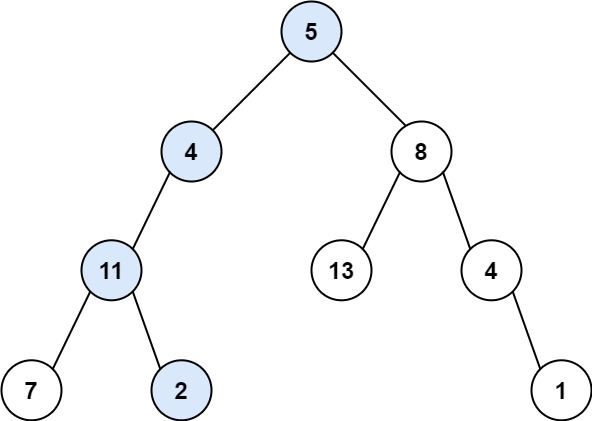

输入：root = [5,4,8,11,null,13,4,7,2,null,null,null,1], targetSum = 22
输出：true
解释：等于目标和的根节点到叶节点路径如上图所示。
示例 2：

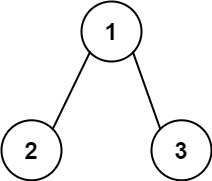

输入：root = [1,2,3], targetSum = 5
输出：false
解释：树中存在两条根节点到叶子节点的路径：
(1 --> 2): 和为 3
(1 --> 3): 和为 4
不存在 sum = 5 的根节点到叶子节点的路径。
示例 3：

输入：root = [], targetSum = 0
输出：false
解释：由于树是空的，所以不存在根节点到叶子节点的路径。
 

提示：

树中节点的数目在范围 [0, 5000] 内
-1000 <= Node.val <= 1000
-1000 <= targetSum <= 1000

In [6]:
class Treenode:
    def __init__(self, val=0, left = None, right = None):
        self.val = val
        self.left = left
        self.right = right
def list_treenode(vals):
    if not vals: 
        return None
    def inner(index):
        if index >= len(vals) or vals[index] is None:
            return None
        node = Treenode(vals[index])
        node.left = inner(2*index + 1)
        node.right = inner(2*index + 2)
        return node
    return inner(0)

def f112(root, targetsum):
    if not root: return False
    targetsum -= root.val
    if root.left is root.right:
        return targetsum == 0
    return f112(root.left, targetsum) or f112(root.right, targetsum)

root = [5,4,8,11,None,13,4,7,2,None,None,None,1]
root = list_treenode(root)
targetsum = 22
f112(root, targetsum)



True

In [7]:
def f112_1(root, targetsum):
    if not root: return False
    targetsum -= root.val
    if not root.left and not root.right:
        return targetsum == 0
    return f112(root.left, targetsum) or f112(root.right, targetsum)

root = [5,4,8,11,None,13,4,7,2,None,None,None,1]
root = list_treenode(root)
targetsum = 22
f112_1(root, targetsum)

True

# 129. 求根节点到叶节点数字之和

给你一个二叉树的根节点 root ，树中每个节点都存放有一个 0 到 9 之间的数字。
每条从根节点到叶节点的路径都代表一个数字：

例如，从根节点到叶节点的路径 1 -> 2 -> 3 表示数字 123 。
计算从根节点到叶节点生成的 所有数字之和 。

叶节点 是指没有子节点的节点。

 

示例 1：

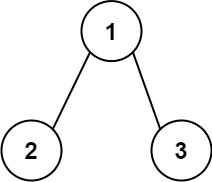

输入：root = [1,2,3]
输出：25
解释：
从根到叶子节点路径 1->2 代表数字 12
从根到叶子节点路径 1->3 代表数字 13
因此，数字总和 = 12 + 13 = 25
示例 2：

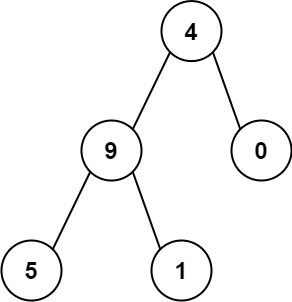

输入：root = [4,9,0,5,1]
输出：1026
解释：
从根到叶子节点路径 4->9->5 代表数字 495
从根到叶子节点路径 4->9->1 代表数字 491
从根到叶子节点路径 4->0 代表数字 40
因此，数字总和 = 495 + 491 + 40 = 1026
 

提示：

树中节点的数目在范围 [1, 1000] 内
0 <= Node.val <= 9
树的深度不超过 10

In [12]:
class Treenode:
    def __init__(self, val=0, left = None, right = None):
        self.val = val
        self.left = left
        self.right = right

def list_treenode(vals):
    if not vals:return None
    def inner(index):
        if index >= len(vals) or vals[index] is None:
            return None
        node = Treenode(vals[index])
        node.left = inner(index*2 + 1)
        node.right =  inner(index*2 + 2)
        return node
    return inner(0)

def f129(root):
    ans = 0
    def dfs(node, x):
        if node is None:
            return
        x = x*10 + node.val
        if not node.left and not node.right:
            nonlocal ans
            ans += x
            return
        dfs(node.left, x)
        dfs(node.right, x)
    dfs(root, 0)
    return ans

root = [4,9,0,5,1]
root = list_treenode(root)
f129(root)

        

1026